In [44]:
import geopandas as gpd
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
import geopandas as gpd

parcels = gpd.read_file("../data/RealProperty.gdb")

In [4]:
# import zipfile

# with zipfile.ZipFile('../data/mastadd14.zip', 'r') as zip_ref:
# zip_ref.extractall('../data')

In [5]:
active_adresses = gpd.read_file("../data/ActiveAdresses.gdb")

In [8]:
# property_database = gpd.read_file("../data/PropertyDatabase.csv")

In [9]:
import pandas as pd

parcels_non_res_list = [
    "VAC RES/ < 10 ACRES",
    "VAC RES/ LOT-SML TRACT",
    "COM/ CONVERTED RESIDENCE",
    "VAC RES/ LOT-SML TR/SIDE",
    "VAC RES/ HOMEOWNERS ASSOC",
    "PRESENT-USE/AGRICULTURAL",
    "PRESENT-USE/FORESTRY",
    "VAC RES/ DEVELOPER",
    "VAC RES/ RURAL < 10 ACRES",
    "VAC AG/ 10 ACRES OR >",
    "VAC RES/ W/ SML IMPROV",
    "VAC RES/ LOT-SML TR/REAR",
    "COM/ RESTAURANTS",
    "PRESENT-USE/HORTICULTURAL",
    "VAC RES/ W/ LEASEHOLD",
    "VAC RES/ UNDERWATER LANDS",
    "VAC AG/ TMBR 20 ACRES & >",
    "WILD/ FOREST LAND - FDRL",
    "IND/ MISC RESEARCH",
    "WILD/ FOREST LAND - STATE",
    "CMNTY SVC/ ABC STORES",
]


parcels_unique_land_classes = pd.Series(parcels["Description_XXDDC1"].unique())
parcels_land_class_counts = parcels["Description_XXDDC1"].value_counts()
parcels_res_string_land_classes = parcels_unique_land_classes[
    parcels_unique_land_classes.str.contains("RES", case=False)
]


parcels_non_res_pattern = "|".join(parcels_non_res_list)
parcels_res_land_classes = parcels_res_string_land_classes[
    ~parcels_res_string_land_classes.str.contains(parcels_non_res_pattern, case=False)
]

parcels_res_land_classes_count = len(parcels_res_land_classes)

print("Unique Land Classes:")
print(parcels_unique_land_classes)

print("Residential Land Classes:")
print(parcels_res_land_classes)
print("Number of Res. Land Classes:")
print(parcels_res_land_classes_count)

print("\nLand Class Counts:")
print(parcels_land_class_counts)

Unique Land Classes:
0                  RES/ 1-FAMILY
1      RES/ RURAL RES W/ ACREAGE
2            VAC RES/ < 10 ACRES
3           VACANT LAND (UNDIFF)
4               RES/ CONDOMINIUM
                 ...            
244         PUBL SVC/ TELEVISION
245      CMNTY SVC/ GOVT HWY GAR
246         COM/ MANUAL CAR WASH
247           COM/ LIVING ACCOMM
248             REC/ PLAYGROUNDS
Length: 249, dtype: object
Residential Land Classes:
0                  RES/ 1-FAMILY
1      RES/ RURAL RES W/ ACREAGE
4               RES/ CONDOMINIUM
5         RES/ TOWNHOUSE W/ LAND
9           RES/ 1-MH OR MH SITE
13                 RES/ 2-FAMILY
27                 RES/ 3-FAMILY
38     RES/ HOMEOWNERS ASSOC IMP
45               RES/ HISTORICAL
51          RES/ DWG + 2-MBL HMS
64           RES/ MULTIPLE DWG'S
70              RES/ MOBILE HOME
74                   RES/ ESTATE
90             RES/ 1-FAMILY S42
105        RES/ 2-MH OR MH SITES
124      RES/ PATIO HOME W/ LAND
131            RES/ 2-FAMILY S42
14

In [10]:
parcels_residential_properties = parcels[
    parcels["Description_XXDDC1"].isin(parcels_res_land_classes)
]

In [11]:
parcels_residential_properties

geopandas.geodataframe.GeoDataFrame

In [12]:
# import pandas as pd

# address_non_res_list = [""]

In [13]:
# import pandas as pd

# non_res_list = ["COM/ CONVERTED RESID","COM/ RESTAURANTS","VAC RES/ W/ SML IMPR","VAC RES/ LOT-SML TRA","VAC RES/ HOMEOWNERS","VACRES/LT-SMLTR/SIDE","VACRES/LT-SMLTR/REAR","VAC RES/ < 10 ACRES", "VAC RES/ DEVELOPER", "VAC RES/ UNDERWATER", "VAC AG/ 10 ACRES OR", "VAC RES/ RURAL < 10","PRESENT-USE/HORTICUL","PRESENT-USE/FORESTRY","PRESENT-USE/AGRICULT","IND/ MISC RESEARCH","VAC RES/ W/ LEASEHOL"]


# res_land_classes_count = len(res_land_classes)

# unique_land_classes = pd.Series(property_database['LAND_CLASS'].unique())
# land_class_counts = property_database['LAND_CLASS'].value_counts()
# res_string_land_classes = unique_land_classes[unique_land_classes.str.contains("RES", case=False)]

# # Create a regex pattern from non_res_list
# non_res_pattern = "|".join(non_res_list)
# res_land_classes = res_string_land_classes[~res_string_land_classes.str.contains(non_res_pattern, case=False)]

# print("Unique Land Classes:")
# print(unique_land_classes)

# print("Residential Land Classes:")
# print(res_land_classes)
# print("Number of Res. Land Classes:")
# print(res_land_classes_count)

# print("\nLand Class Counts:")
# print(land_class_counts)

In [15]:
# residential_properties = property_database[property_database['LAND_CLASS'].isin(res_land_classes)]

In [14]:
# residential_properties

In [16]:
parcels_residential_properties_cp = parcels_residential_properties.copy()

In [17]:
parcels_residential_properties_cp.head()

,Tax_Year_AKYEAR,Parcel_Descr_Code_2_AKRDC2,Description_XXDDC2,Parcel_Number_AKPAR_,Previous_Parcel_Num_AKPARP,Map_Num_PIN_AKMAP_,Submap_PIN_AKSMAP,Block_PIN_AKBLOC,Parcel_PIN_AKPARC,Subparcel_PIN_AKSPAR,...,AREA_3_Num_OF_UNITS_XXAR3U,Effective_Year_Built_AHEFYR,F2nd_Imp_Yr_Effective_Yr_AHEFY2,F3rd_Imp_Yr_Effective_Yr_AHEFY3,Parcel_Descr_Code_5_AKRDC5,ValuationBaseYear,WGS84_X,WGS84_Y,GlobalID,geometry
0,2018,,,104368,,0821,17,11,2983,,...,0.0,0,0,0,R,2016,-78.928077,35.980837,{85B4668D-E6EE-4470-B92C-AB405ED753B0},POINT (2021279.796 811930.264)
1,2018,F11,WIP11 - SPLIT/DESCENDANT,212357,169842,0852,04,53,0360,,...,0.0,0,0,0,R,2016,-78.813803,36.011975,{450B6743-4911-4DBB-A405-DF9810B88476},POINT (2055068.865 823309.218)
2,2018,T98,WIP98 - DIRECT TRANSFER,165637,,0850,02,68,1527,,...,0.0,0,0,0,R,2016,-78.810277,35.971455,{30E6BA12-1DE6-4D6F-9EBE-6EDB08CDDFE6},POINT (2056139.874 808561.058)
3,2018,,,191531,,0837,04,84,1167,,...,0.0,0,0,0,R,2016,-78.870626,36.151723,{77A69834-4DB0-47E2-A8D3-77106E9456CD},POINT (2038196.923 874155.560)
4,2018,F15,WIP15 - SPLIT/DESCENDANT,216169,193265,0769,01,45,3200,,...,0.0,0,0,0,R,2016,-78.782778,35.934715,{05B4752A-6150-45A3-A47F-31958FB54CB6},POINT (2064306.049 795203.746)


In [45]:
active_adresses.head()

,HOUSENUM,HOUSENUMSU,STREETDIR,STREETNAME,STREETTYPE,STDIRSUF,UNIT,PARCEL_ID,PIN,COMMENT,CITY,BLDG,ID,SITE_ADDRE,EDITDATE,CREATEDATE,PENDING,SUBDIVISION,CREATED_BY,TYPE,USPS_ADDRESS,ZIPCODE,IMPROVED,RETIRE_DATE,RETIRED_BY,RETIRE_REASON,RETIRE_FLAG,VALID_FLAG,EDIT_REASON,RES_TYPE,OUTSIDE_COUNTY,MILEMARKER,Last,CITY2,GlobalID,geometry
0,7.0,,,TUMLIN,CT,,,167849,0851-02-68-5604,,DURH,,27352.0,7 TUMLIN CT,NaT,NaT,None,None,None,None,None,27703,None,NaT,None,None,None,None,None,None,None,None,N,DURHAM,{060BA8AA-0E82-4358-8470-E7EB85B49CD1},POINT (2056511.247 818633.440)
1,2211.0,,,HOLLOWAY,ST,,,130403,0841-09-05-9768,,DURH,,30031.0,2211 HOLLOWAY ST,NaT,NaT,None,None,None,None,None,27703,None,NaT,None,None,None,None,None,None,None,None,N,DURHAM,{37BF9914-BBFE-4214-B4F9-00BFA7382E33},POINT (2040966.937 815762.120)
2,3600.0,,,FARM GATE,AVE,,,130622,0812-01-49-5635,,DURH,,41268.0,3600 FARM GATE AVE,NaT,NaT,None,None,None,None,None,27705,None,NaT,None,None,None,None,None,None,None,None,N,DURHAM,{1C9A4894-A4C5-4956-BCC3-B6E7196BAAD1},POINT (2014534.627 829765.020)
3,3207.0,,,SHAFTSBURY,ST,,,125962,0823-15-54-9629,,DURH,,18103.0,3207 SHAFTSBURY ST,NaT,NaT,None,None,None,None,None,27704,None,NaT,None,None,None,None,None,None,None,None,N,DURHAM,{C9D39651-6AFB-4448-B11F-BCB17C6211EC},POINT (2025931.117 834703.200)
4,220.0,None,,SPANIEL,DR,,None,225950,0759-60-59-4162,None,MORR,None,233224.0,220 SPANIEL DR,2020-07-27 00:00:00+00:00,2019-04-25 00:00:00+00:00,None,None,ADDR_COOR,None,Y,27703,Y,NaT,None,None,None,Y,None,None,None,None,N,MORRISVILLE,{C0EB0FD7-7364-4E70-8841-33810E3C9550},POINT (2056533.564 790914.008)


In [25]:
parcels_residential_properties_cp.shape, active_adresses.shape

((88206, 227), (161426, 36))

In [ ]:
parcels_residential_properties.to_csv("../data/parcels_residential_properties.csv")

In [ ]:
list(parcels_residential_properties_cp.columns)

['Tax_Year_AKYEAR',
 'Parcel_Descr_Code_2_AKRDC2',
 'Description_XXDDC2',
 'Parcel_Number_AKPAR_',
 'Previous_Parcel_Num_AKPARP',
 'Map_Num_PIN_AKMAP_',
 'Submap_PIN_AKSMAP',
 'Block_PIN_AKBLOC',
 'Parcel_PIN_AKPARC',
 'Subparcel_PIN_AKSPAR',
 'Physical_LocationNum_AKPLC_',
 'City_Code_AKCYCD',
 'Routing_Number_AKROUT',
 'Owner_ID_AKOWID',
 'Current_Owner_ID_AKCOID',
 'Name_1_OWNAM1',
 'Name_2_OWNAM2',
 'Name_3_OWNAM3',
 'Taypayer_Address_1_OWADR1',
 'Taxpayer_Address_2_OWADR2',
 'Taxpayer_Address_3_OWADR3',
 'Taxpayer_Address_4_OWADR4',
 'Taxpayer_City_OWCITY',
 'State_OWSTA',
 'ZIP_Code_OWZIPA',
 'PhysLc_StreetNum_AKPST_',
 'PhysLc_StrNum_Suffix_AKPSSX',
 'PhysLc_Str_Direction_AKPDIR',
 'PhysLc_Street_Name_AKPSTN',
 'PhysLc_Str_Type_AKPSTP',
 'PhysLc_Dir_Suffix_AKPDSX',
 'PhysLc_UnitNum_AKPUN_',
 'Deed_Acres_AKACRD',
 'Map_Acres_AKACRM',
 'District_Code_AKDSCD',
 'Township_Code_AKTWCD',
 'Parcel_Descr_Code_3_AKRDC3',
 'Description_XXDDC3',
 'Parcel_Descr_Code_1_AKRDC1',
 'Description

['Tax_Year_AKYEAR',
 'Parcel_Descr_Code_2_AKRDC2',
 'Description_XXDDC2',
 'Parcel_Number_AKPAR_',
 'Previous_Parcel_Num_AKPARP',
 'Map_Num_PIN_AKMAP_',
 'Submap_PIN_AKSMAP',
 'Block_PIN_AKBLOC',
 'Parcel_PIN_AKPARC',
 'Subparcel_PIN_AKSPAR',
 'Physical_LocationNum_AKPLC_',
 'City_Code_AKCYCD',
 'Routing_Number_AKROUT',
 'Owner_ID_AKOWID',
 'Current_Owner_ID_AKCOID',
 'Name_1_OWNAM1',
 'Name_2_OWNAM2',
 'Name_3_OWNAM3',
 'Taypayer_Address_1_OWADR1',
 'Taxpayer_Address_2_OWADR2',
 'Taxpayer_Address_3_OWADR3',
 'Taxpayer_Address_4_OWADR4',
 'Taxpayer_City_OWCITY',
 'State_OWSTA',
 'ZIP_Code_OWZIPA',
 'PhysLc_StreetNum_AKPST_',
 'PhysLc_StrNum_Suffix_AKPSSX',
 'PhysLc_Str_Direction_AKPDIR',
 'PhysLc_Street_Name_AKPSTN',
 'PhysLc_Str_Type_AKPSTP',
 'PhysLc_Dir_Suffix_AKPDSX',
 'PhysLc_UnitNum_AKPUN_',
 'Deed_Acres_AKACRD',
 'Map_Acres_AKACRM',
 'District_Code_AKDSCD',
 'Township_Code_AKTWCD',
 'Parcel_Descr_Code_3_AKRDC3',
 'Description_XXDDC3',
 'Parcel_Descr_Code_1_AKRDC1',
 'Description

<Axes: >

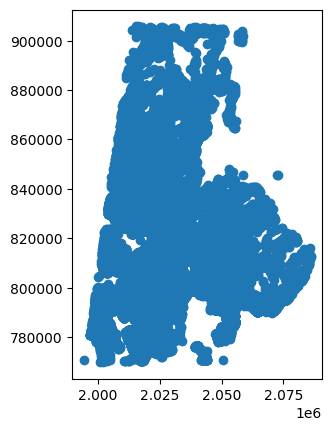

In [40]:
parcels_residential_properties_cp.plot()

In [37]:
parcels_residential_properties_cp_joined = parcels_residential_properties_cp.sjoin(
    active_adresses.to_crs(parcels_residential_properties_cp.crs),
    how="left",
    predicate="contains",
)

parcels_residential_properties_cp_joined.head()

,Tax_Year_AKYEAR,Parcel_Descr_Code_2_AKRDC2,Description_XXDDC2,Parcel_Number_AKPAR_,Previous_Parcel_Num_AKPARP,Map_Num_PIN_AKMAP_,Submap_PIN_AKSMAP,Block_PIN_AKBLOC,Parcel_PIN_AKPARC,Subparcel_PIN_AKSPAR,...,RETIRE_REASON,RETIRE_FLAG,VALID_FLAG,EDIT_REASON,RES_TYPE,OUTSIDE_COUNTY,MILEMARKER,Last,CITY2,GlobalID_right
0,2018,,,104368,,0821,17,11,2983,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,F11,WIP11 - SPLIT/DESCENDANT,212357,169842,0852,04,53,0360,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,T98,WIP98 - DIRECT TRANSFER,165637,,0850,02,68,1527,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,,,191531,,0837,04,84,1167,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,F15,WIP15 - SPLIT/DESCENDANT,216169,193265,0769,01,45,3200,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
parcels_residential_properties_cp_joined.isna().sum()

Tax_Year_AKYEAR                   0
Parcel_Descr_Code_2_AKRDC2        0
Description_XXDDC2                0
Parcel_Number_AKPAR_              0
Previous_Parcel_Num_AKPARP        0
                              ...  
OUTSIDE_COUNTY                88206
MILEMARKER                    88206
Last                          88206
CITY2                         88206
GlobalID_right                88206
Length: 263, dtype: int64